In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas_profiling
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
pf = df.profile_report(minimal=True)
pf.to_widgets()
# pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.skew()

UDI                         0.000000
Air temperature [K]         0.114274
Process temperature [K]     0.015027
Rotational speed [rpm]      1.993171
Torque [Nm]                -0.009517
Tool wear [min]             0.027292
Machine failure             5.151852
TWF                        14.644462
HDF                         9.164789
PWF                        10.114516
OSF                         9.953916
RNF                        22.879570
dtype: float64

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

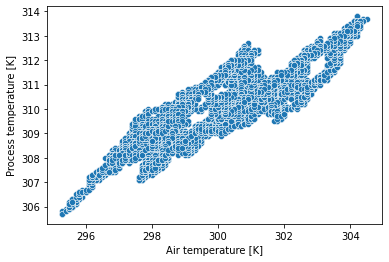

In [6]:
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=df)

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Rotational speed [rpm]'>

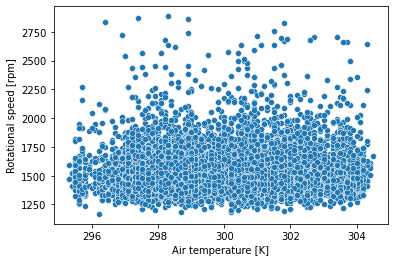

In [7]:
sns.scatterplot(x='Air temperature [K]', y='Rotational speed [rpm]', data=df)

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Torque [Nm]'>

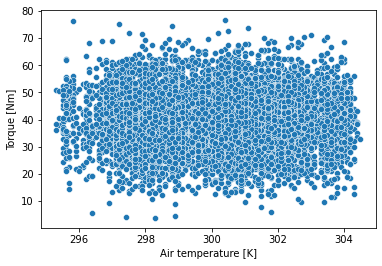

In [8]:
sns.scatterplot(x='Air temperature [K]', y='Torque [Nm]', data=df)

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Tool wear [min]'>

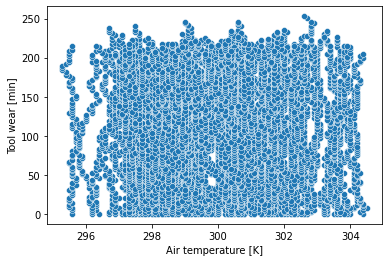

In [9]:
sns.scatterplot(x='Air temperature [K]', y='Tool wear [min]', data=df)

array([[<AxesSubplot:xlabel='Air temperature [K]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Process temperature [K]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Torque [Nm]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Tool wear [min]', ylabel='Air temperature [K]'>],
       [<AxesSubplot:xlabel='Air temperature [K]', ylabel='Process temperature [K]'>,
        <AxesSubplot:xlabel='Process temperature [K]', ylabel='Process temperature [K]'>,
        <AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Process temperature [K]'>,
        <AxesSubplot:xlabel='Torque [Nm]', ylabel='Process temperature [K]'>,
        <AxesSubplot:xlabel='Tool wear [min]', ylabel='Process temperature [K]'>],
       [<AxesSubplot:xlabel='Air temperature [K]', ylabel='Rotational speed [rpm]'>,
        <AxesSubplot:xlabel='Process temperature [K]', ylabel='Rotational speed [rp

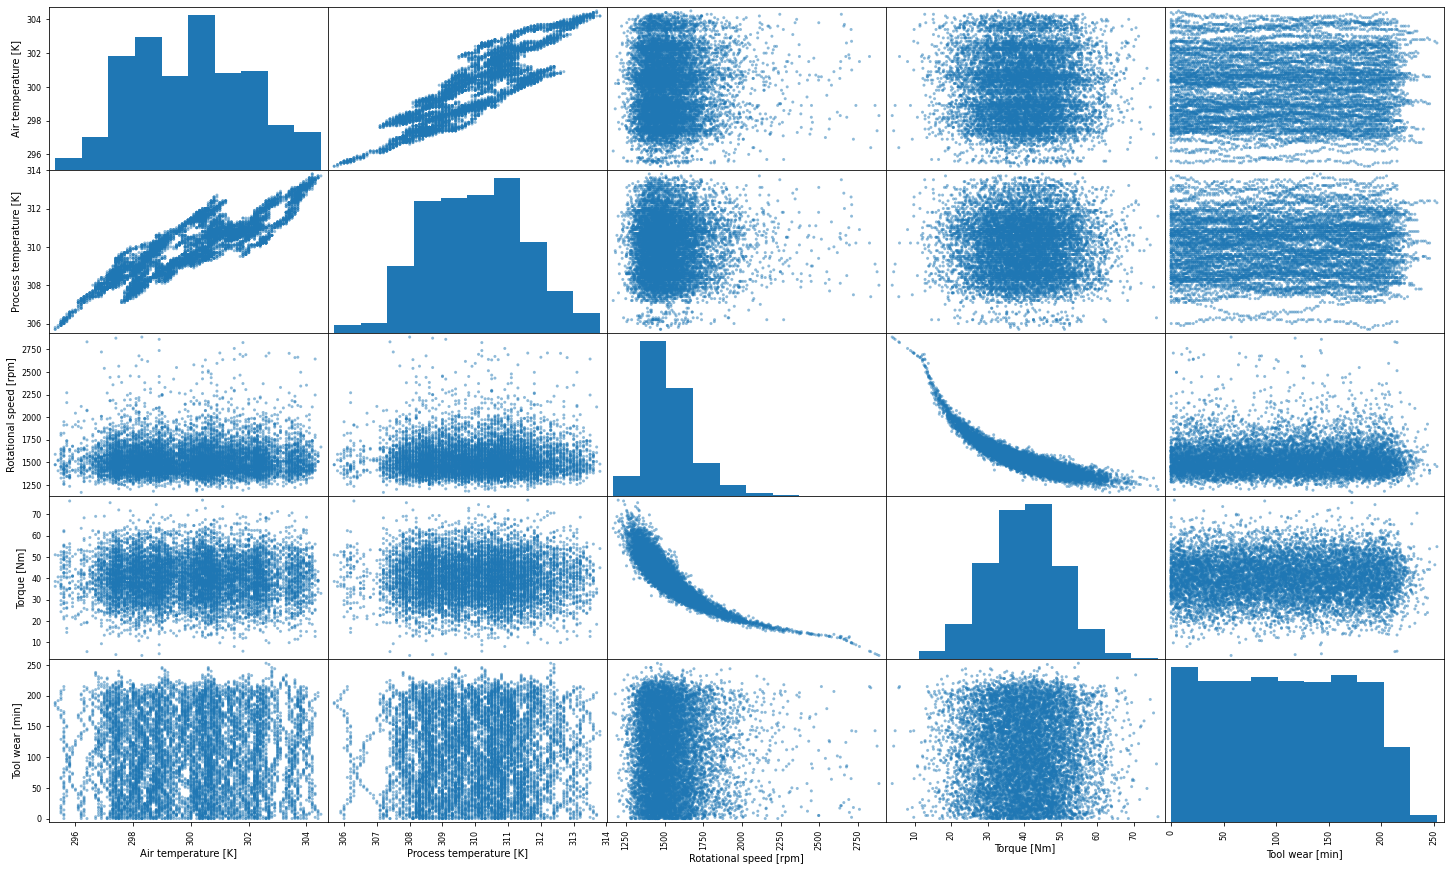

In [10]:
pd.plotting.scatter_matrix(df.iloc[:,3:8], figsize=(25,15))

1. 'Air temperature' and 'Process temperature' has linear relationship in between.
2. There is some sort of relation in between 'Torque' and 'Rotational speed'.


In [11]:
df.isnull().sum()
# so there isnt any null values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

<AxesSubplot:>

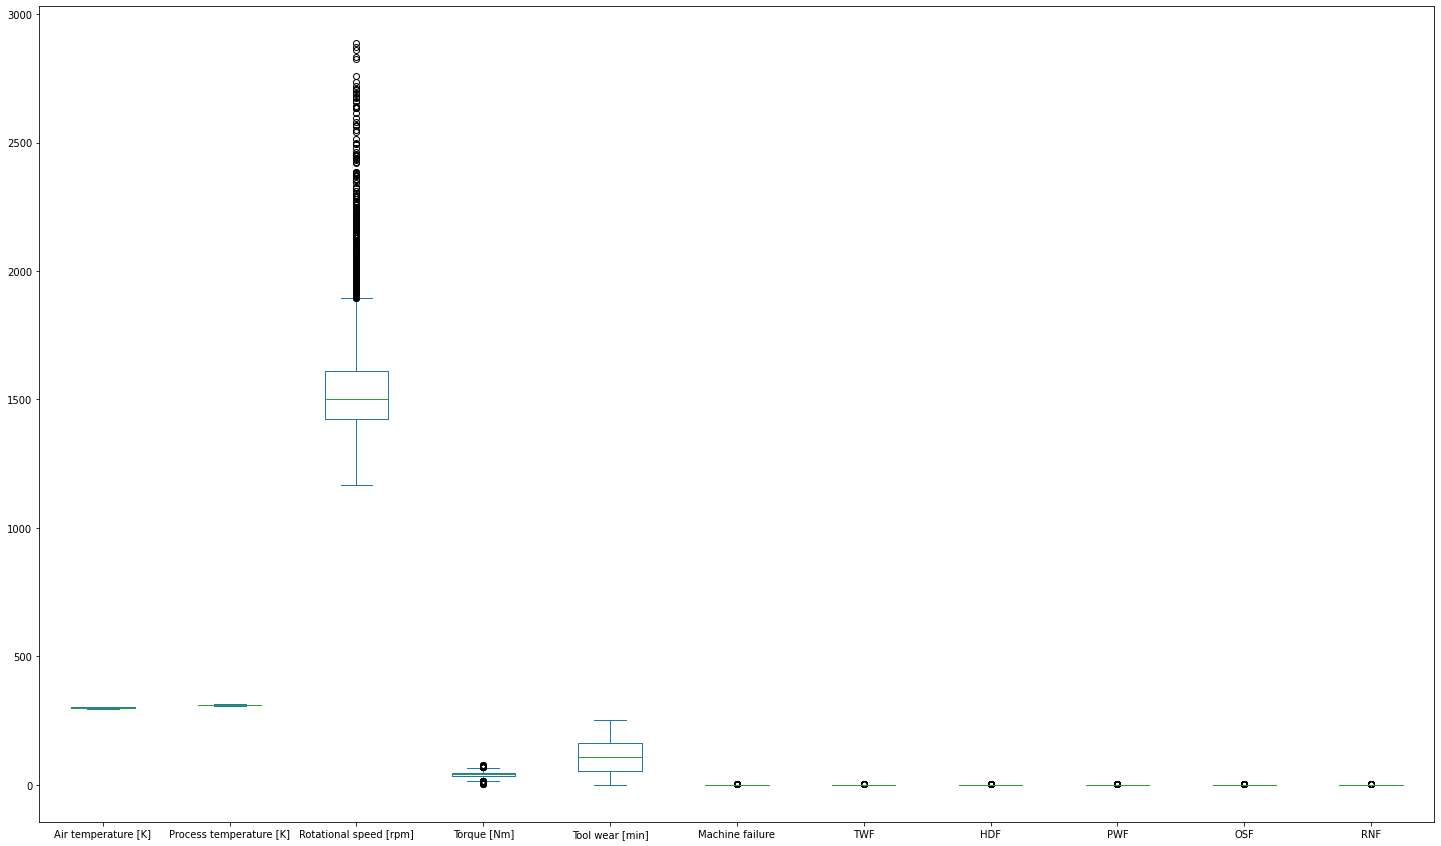

In [12]:
df.iloc[:,1:].plot(kind="box", figsize=(25,15))

array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>,
        <AxesSubplot:title={'center':'Rotational speed [rpm]'}>],
       [<AxesSubplot:title={'center':'Torque [Nm]'}>,
        <AxesSubplot:title={'center':'Tool wear [min]'}>,
        <AxesSubplot:title={'center':'Machine failure'}>],
       [<AxesSubplot:title={'center':'TWF'}>,
        <AxesSubplot:title={'center':'HDF'}>,
        <AxesSubplot:title={'center':'PWF'}>],
       [<AxesSubplot:title={'center':'OSF'}>,
        <AxesSubplot:title={'center':'RNF'}>, <AxesSubplot:>]],
      dtype=object)

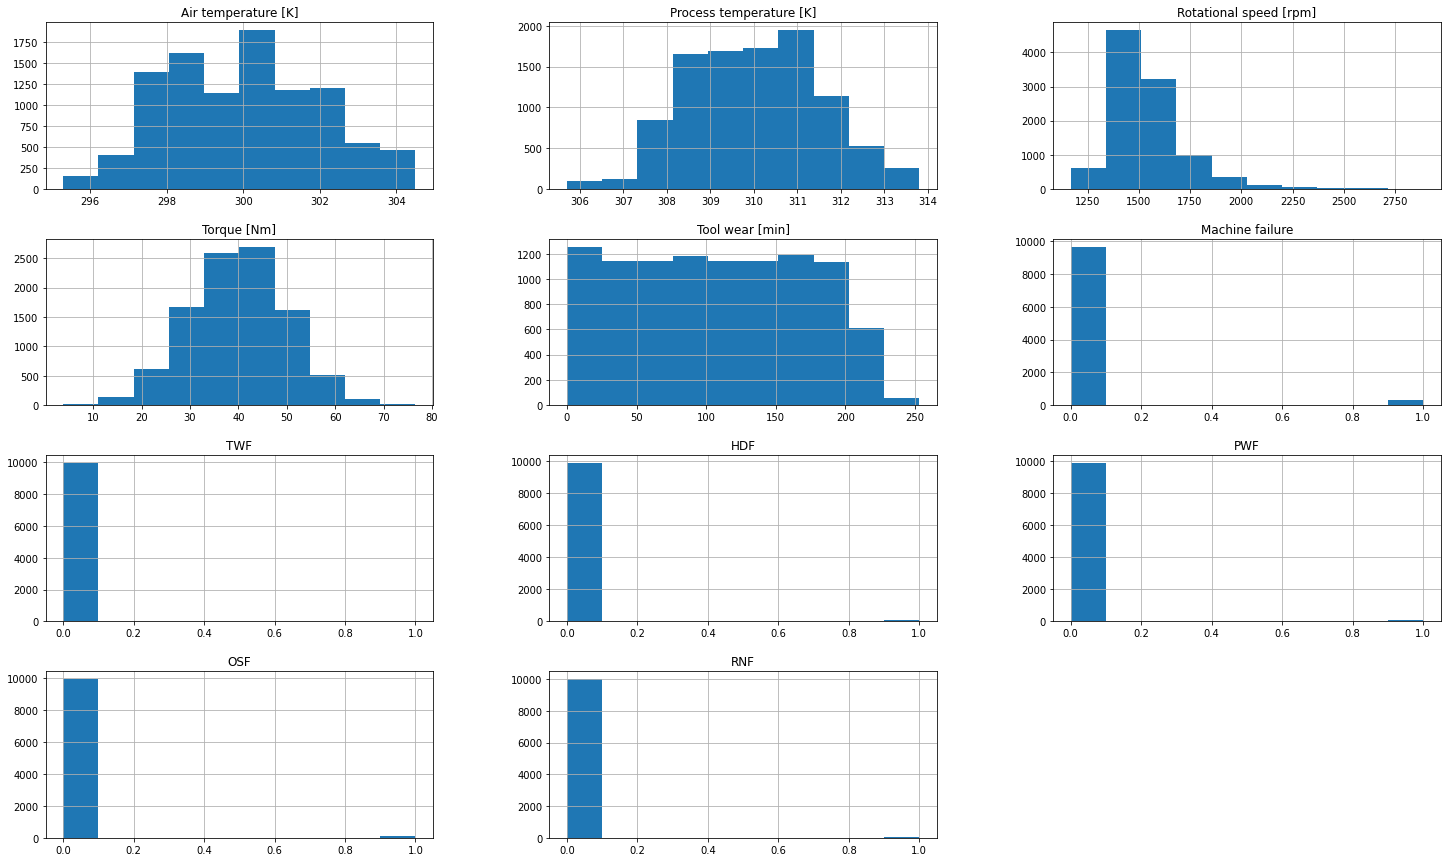

In [13]:
df.iloc[:,1:].hist(figsize=(25,15))

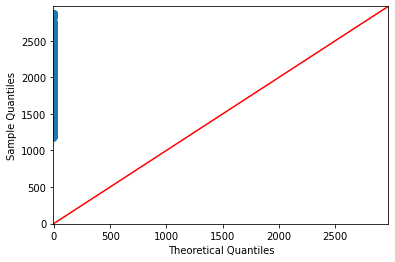

In [14]:
import statsmodels.api as sm
import pylab

sm.qqplot(df["Rotational speed [rpm]"], line='45')
pylab.show()

In [15]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [16]:
import scipy.stats as stats

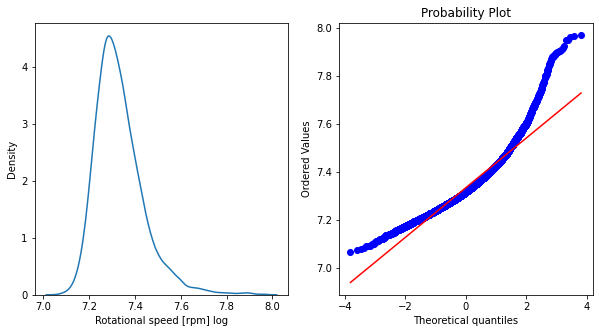

In [17]:
# logarithmic transformation
df["Rotational speed [rpm] log"] = np.log(df["Rotational speed [rpm]"])
normality(df, "Rotational speed [rpm] log")

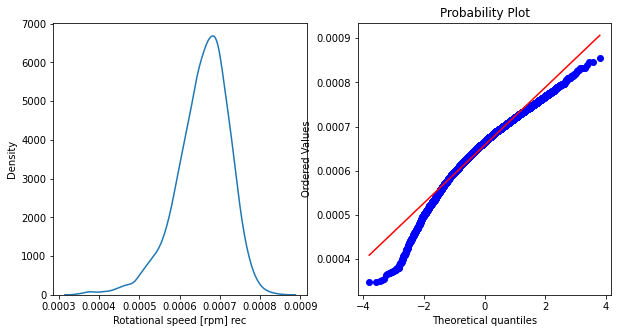

In [18]:
# reciprocal transformation
df["Rotational speed [rpm] rec"] = 1/df["Rotational speed [rpm]"]
normality(df, "Rotational speed [rpm] rec")

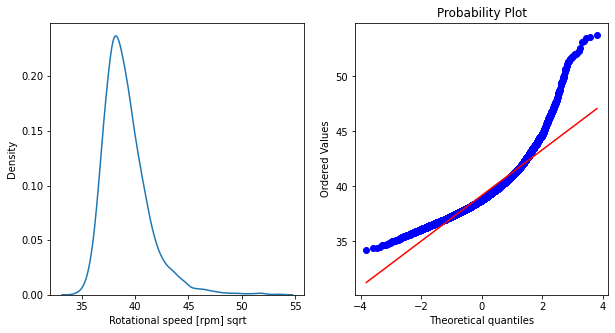

In [19]:
# square root transformation
df["Rotational speed [rpm] sqrt"] = np.sqrt(df["Rotational speed [rpm]"])
normality(df, "Rotational speed [rpm] sqrt")

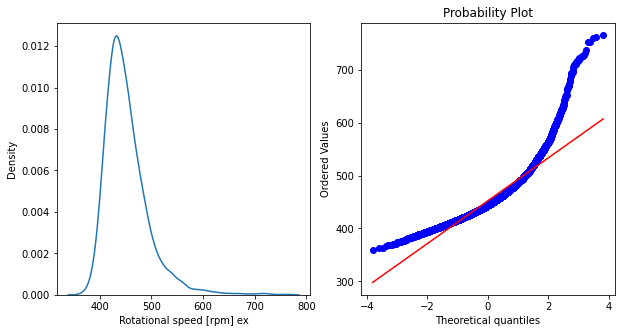

In [20]:
# exponential transformation
df["Rotational speed [rpm] ex"] = df["Rotational speed [rpm]"] ** (1/1.2)
normality(df, "Rotational speed [rpm] ex")

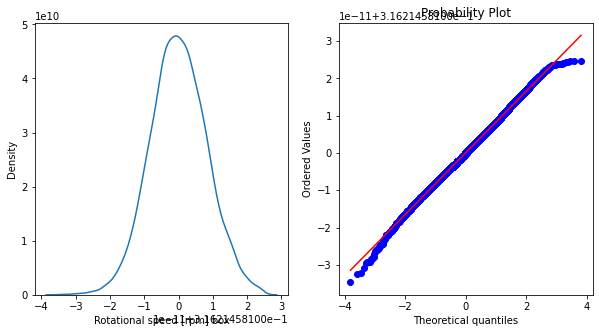

In [21]:
# box cox transformation
df["Rotational speed [rpm] box"], parameter = stats.boxcox(df["Rotational speed [rpm]"])
normality(df, "Rotational speed [rpm] box")

In [22]:
x = df[["Process temperature [K]", "Rotational speed [rpm] box", "Torque [Nm]", "Tool wear [min]", "Machine failure",
       "TWF", "HDF", "PWF", "OSF", "RNF"]]
y = df[["Air temperature [K]"]]

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [24]:
lr.fit(x, y)

LinearRegression()

In [25]:
lr.coef_

array([[ 1.17364764e+00,  5.88636142e+09,  1.68430849e-03,
         8.38443565e-05, -6.59425779e-02,  1.80993010e-01,
         1.77580716e+00,  1.58673014e-01, -5.55116438e-02,
        -5.90066219e-02]])

In [26]:
lr.intercept_

array([-1.86135337e+09])

In [27]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Rotational speed [rpm] log,Rotational speed [rpm] rec,Rotational speed [rpm] sqrt,Rotational speed [rpm] ex,Rotational speed [rpm] box
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,7.346655,0.000645,39.382737,455.872259,0.316215
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,7.249926,0.000710,37.523326,420.567342,0.316215
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,7.311886,0.000668,38.704005,442.853258,0.316215
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,7.267525,0.000698,37.854986,426.781081,0.316215
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,7.249926,0.000710,37.523326,420.567342,0.316215


In [28]:
lr.predict([[308.6, 0.316215, 42.8, 0, 0, 0,0,0,0,0]])

/home/calkikhunt/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2764.71631622]])

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Process temperature [K]     10000 non-null  float64
 1   Rotational speed [rpm] box  10000 non-null  float64
 2   Torque [Nm]                 10000 non-null  float64
 3   Tool wear [min]             10000 non-null  int64  
 4   Machine failure             10000 non-null  int64  
 5   TWF                         10000 non-null  int64  
 6   HDF                         10000 non-null  int64  
 7   PWF                         10000 non-null  int64  
 8   OSF                         10000 non-null  int64  
 9   RNF                         10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


In [30]:
lr.score(x, y)

0.7756994347431948